# Team Six - Kyle, Yash, Charlie, and Sebastian: Feature engineering our dataset and preliminary EDA.

#### Importing relevant packages and modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
import os
import functools as ft
from collections import defaultdict
import scipy.stats as stats

#### Reading in our dataset

In [2]:
teamSix = pd.read_csv("finalTeamSixDataset.csv")
teamSix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   year                                                    2899 non-null   int64  
 1   FIPS                                                    2899 non-null   int64  
 2   county                                                  2899 non-null   object 
 3   state                                                   2899 non-null   object 
 4   urban                                                   2899 non-null   object 
 5   analysis_value                                          2899 non-null   int64  
 6   Less than 50k                                           2899 non-null   float64
 7   50k to 99,999                                           2899 non-null   float64
 8   100k to 149,999                       

#### Checking the remaining percentages of missing values for each feature in the dataset

In [3]:
100*(teamSix.isna().sum())/len(teamSix)

year                                                      0.000000
FIPS                                                      0.000000
county                                                    0.000000
state                                                     0.000000
urban                                                     0.000000
analysis_value                                            0.000000
Less than 50k                                             0.000000
50k to 99,999                                             0.000000
100k to 149,999                                           0.000000
Over 150k                                                 0.000000
Total not grad HS                                         0.000000
Total grad HS                                             0.000000
Total Associates                                          0.000000
Total Bachelors                                           0.000000
Total Professional or Graduate Degrees                    0.00

#### Checking value counts for age features

In [4]:
(teamSix.iloc[:,22] + teamSix.iloc[:,23] + teamSix.iloc[:,24]).value_counts()

1.0    1477
1.0     948
1.0     474
Name: count, dtype: int64

#### Uses a heat map to check correlation between variables

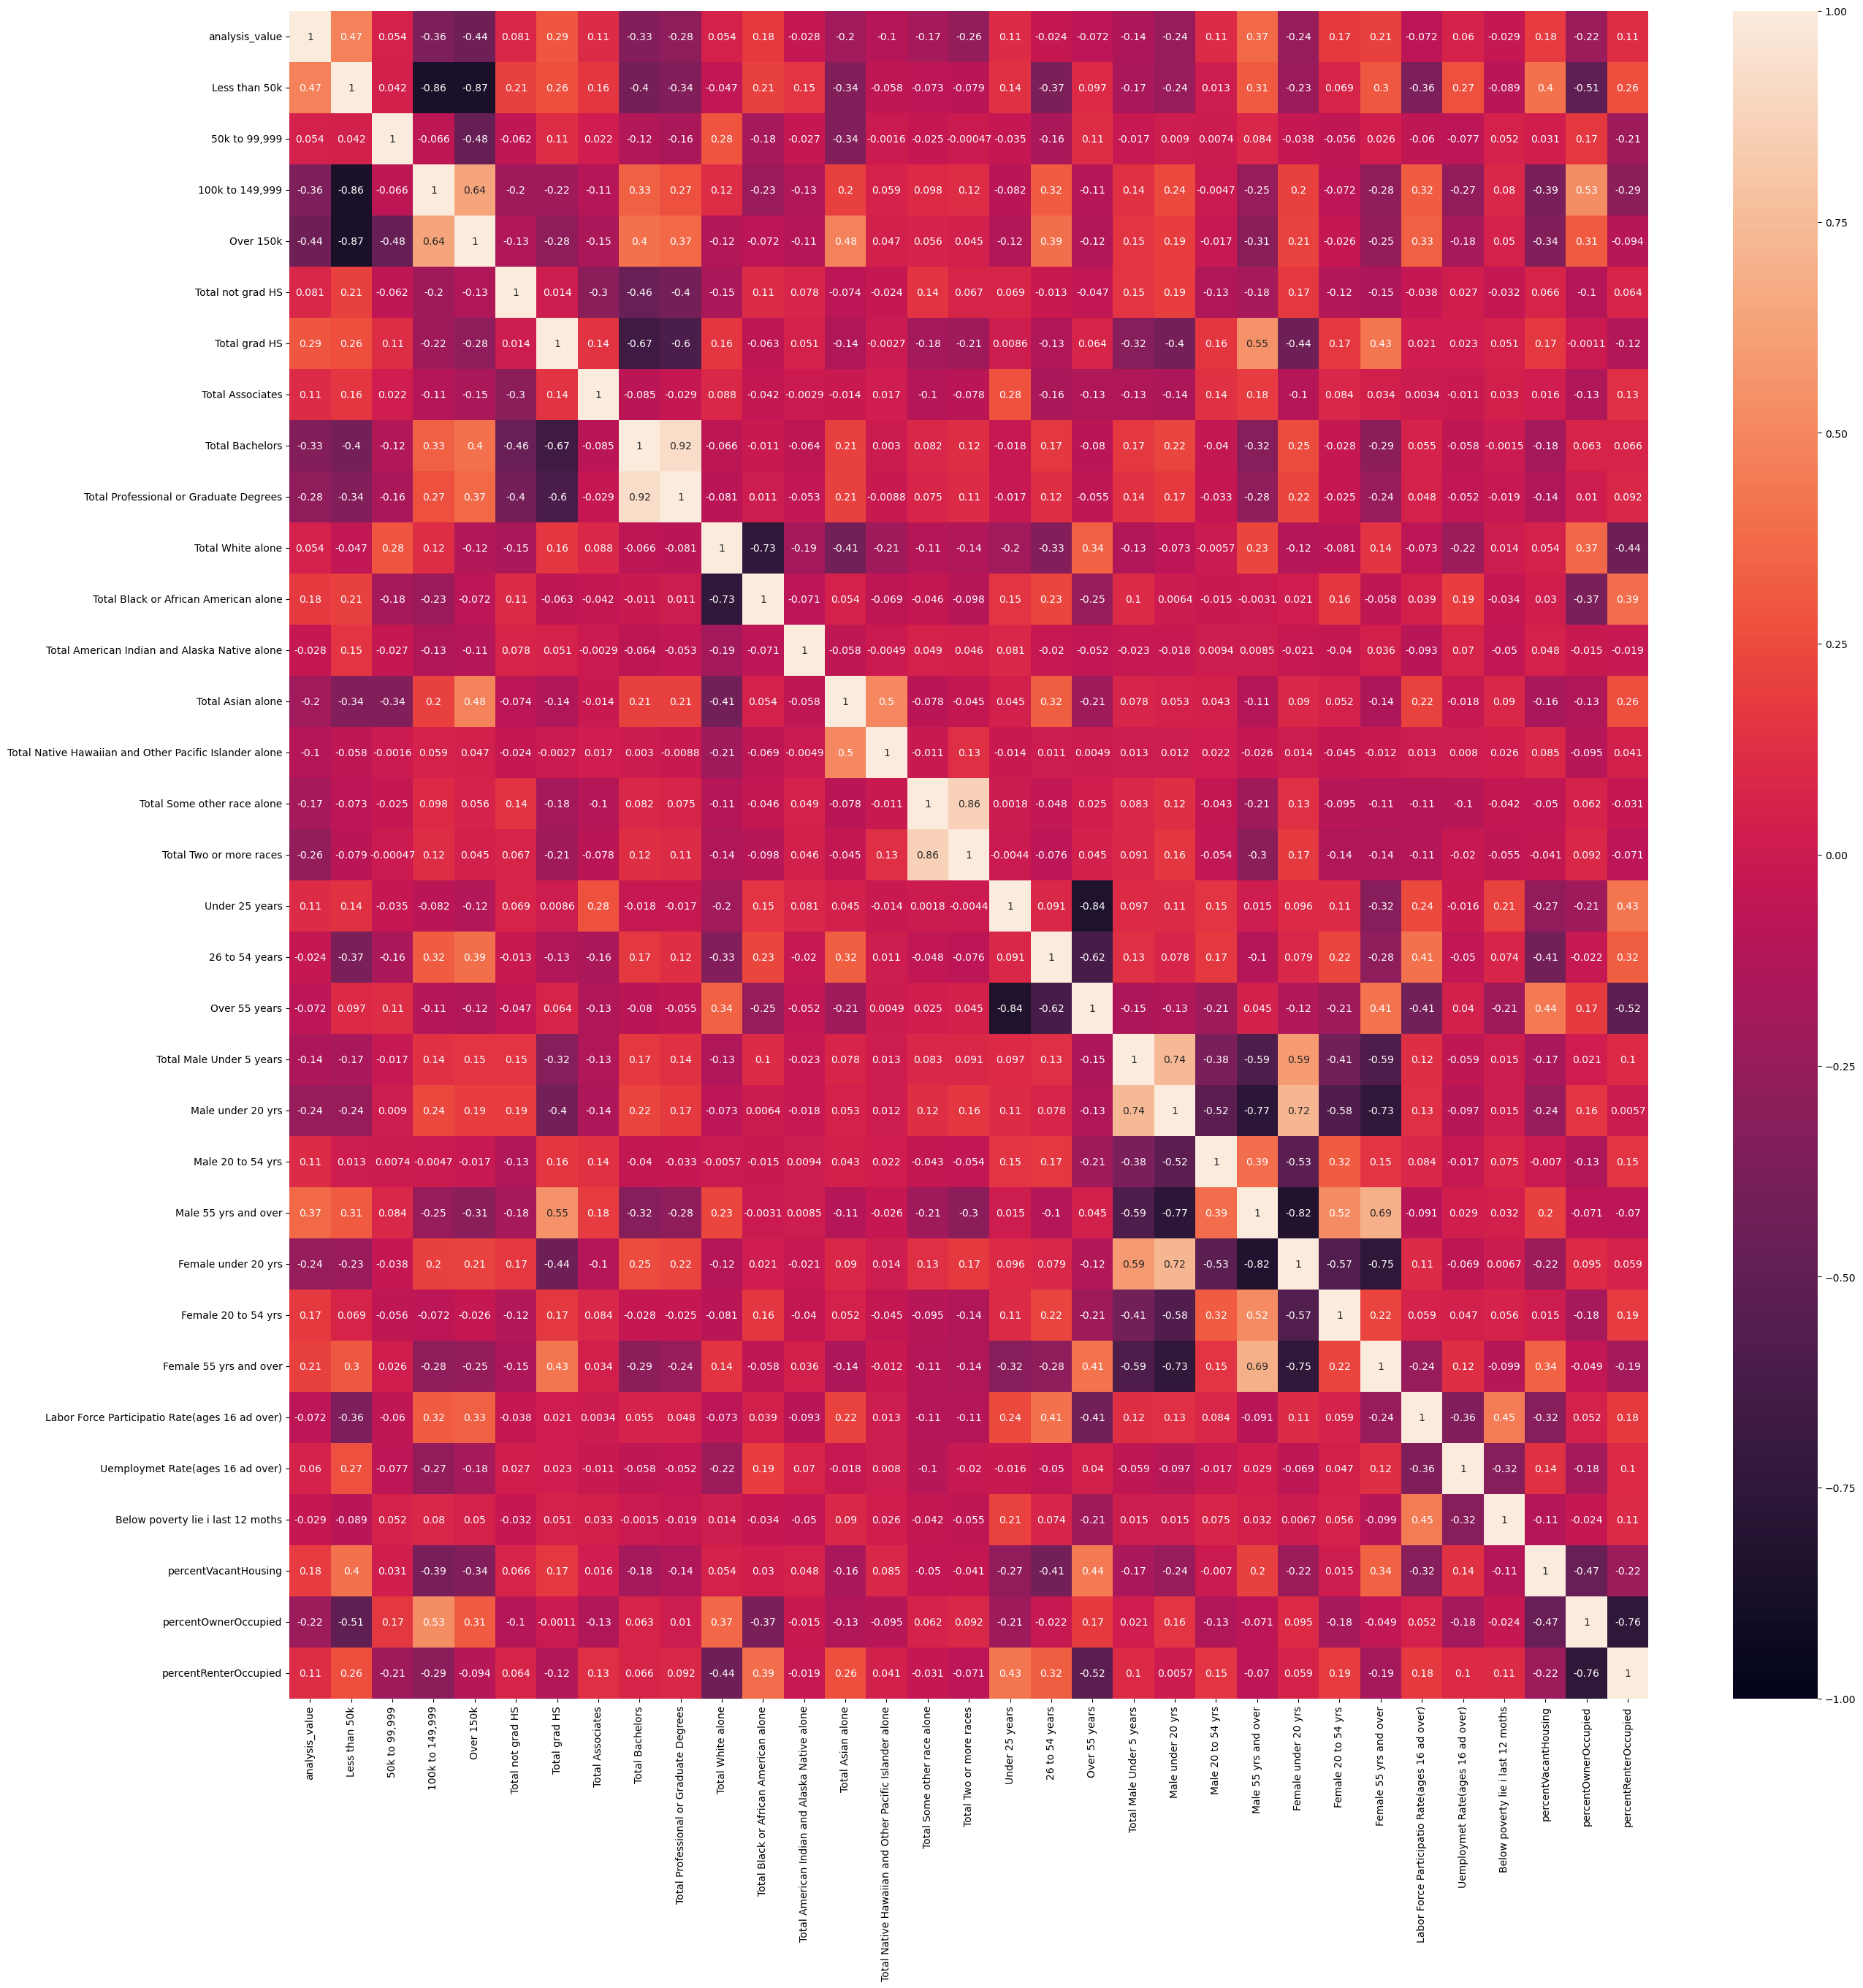

In [5]:
plt.figure(figsize=(30, 30))
# Select only numerical columns
numerical_features = teamSix.drop(['FIPS', 'year'], axis=1).select_dtypes(include=[np.number])
sns.heatmap(numerical_features.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

## Heat map observations:
- All incomes are correlated with eachother, which somewhat makes sense
- Total White and Total Black are negatively correlated
- Under 25 years and over 55 years old (insurance) are correlated
- Male over 55 years and older and female under 20 years are are strongly, negatively correlated
- Female over 55 years and older and male under 20 years are are strongly, negatively correlated
- Percent Owner Occupied and percent Renter Occupied are negatively correlated
- Male under 20 and Male over 55 are correlated

#### Allows dataframes to display every column, as well as removes the limit on the length of feature names

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
teamSix.head()

,year,FIPS,county,state,urban,analysis_value,Less than 50k,"50k to 99,999","100k to 149,999",Over 150k,Total not grad HS,Total grad HS,Total Associates,Total Bachelors,Total Professional or Graduate Degrees,Total White alone,Total Black or African American alone,Total American Indian and Alaska Native alone,Total Asian alone,Total Native Hawaiian and Other Pacific Islander alone,Total Some other race alone,Total Two or more races,Under 25 years,26 to 54 years,Over 55 years,Total Male Under 5 years,Male under 20 yrs,Male 20 to 54 yrs,Male 55 yrs and over,Female under 20 yrs,Female 20 to 54 yrs,Female 55 yrs and over,Region,Labor Force Participatio Rate(ages 16 ad over),Uemploymet Rate(ages 16 ad over),Below poverty lie i last 12 moths,percentVacantHousing,percentOwnerOccupied,percentRenterOccupied
0,2018,10001,Kent County,DELAWARE,Urban,681,0.456,0.320,0.144,0.080,0.097907,0.441710,0.067980,0.286056,0.045462,0.652641,0.254954,0.008715,0.023209,0.000594,0.009728,0.050160,0.345204,0.354912,0.299883,0.032523,0.129504,0.244576,0.620353,0.109308,0.254870,0.126553,South,65.4,6.7,36.1,7.176477,63.107846,29.715677
1,2018,10003,New Castle County,DELAWARE,Urban,638,0.362,0.313,0.166,0.159,0.054032,0.311294,0.059913,0.435119,0.068190,0.632347,0.259154,0.002703,0.056394,0.000638,0.025178,0.023585,0.324335,0.385860,0.289805,0.029281,0.123087,0.254154,0.612921,0.100335,0.264326,0.122381,South,55.3,4.0,36.6,8.076407,62.399490,29.524102
2,2018,10005,Sussex County,DELAWARE,Rural,594,0.408,0.335,0.147,0.110,0.065877,0.402975,0.058478,0.345817,0.057711,0.826732,0.118272,0.005796,0.014550,0.001888,0.016713,0.016050,0.255339,0.302614,0.442047,0.023665,0.098894,0.211613,0.687779,0.078090,0.215338,0.197151,South,70.7,7.5,25.8,33.746066,53.119241,13.134692
3,2018,11001,District of Columbia,DISTRICT OF COLUMBIA,Urban,917,0.330,0.229,0.165,0.275,0.048637,0.225696,0.037721,0.699749,0.160299,0.422443,0.455228,0.002750,0.039203,0.000565,0.043984,0.035827,0.315873,0.463912,0.220215,0.034069,0.106198,0.290003,0.595624,0.083482,0.312362,0.097696,South,61.4,5.8,39.0,10.045403,38.031285,51.923312
4,2018,12001,Alachua County,FLORIDA,Urban,736,0.483,0.283,0.121,0.113,0.042081,0.247818,0.130255,0.505033,0.084823,0.692046,0.195291,0.003593,0.063029,0.001052,0.009653,0.035335,0.410785,0.342095,0.247120,0.026171,0.118323,0.263065,0.597231,0.106773,0.275245,0.106666,South,61.0,5.3,38.4,17.806768,49.166989,33.026243


#### Renames goofy column names

In [7]:
teamSix.rename(columns = {'Labor Force Participatio Rate(ages 16 ad over)': 'Labor Force Participation Rate(ages 16 and over)'}, inplace = True)
teamSix.rename(columns = {'Uemploymet Rate(ages 16 ad over)':'Unemployment Rate(ages 16 and over)'}, inplace = True)
teamSix.rename(columns = {'Below poverty lie i last 12 moths':'Below poverty line in last 12 months'}, inplace = True)

#### Defines a function to impute missing values by the mean by state and year

In [8]:
def impute_by_state_and_year(df, cols_to_impute):
    for col in cols_to_impute:
        df[col] = df.groupby(['state', 'year'])[col].transform(lambda x: x.fillna(x.mean()))
    return df

#### Applies the above function

In [9]:
x = ['Labor Force Participation Rate(ages 16 and over)', 'Unemployment Rate(ages 16 and over)', 'Below poverty line in last 12 months']
impute_by_state_and_year(teamSix, x)

,year,FIPS,county,state,urban,analysis_value,Less than 50k,"50k to 99,999","100k to 149,999",Over 150k,Total not grad HS,Total grad HS,Total Associates,Total Bachelors,Total Professional or Graduate Degrees,Total White alone,Total Black or African American alone,Total American Indian and Alaska Native alone,Total Asian alone,Total Native Hawaiian and Other Pacific Islander alone,Total Some other race alone,Total Two or more races,Under 25 years,26 to 54 years,Over 55 years,Total Male Under 5 years,Male under 20 yrs,Male 20 to 54 yrs,Male 55 yrs and over,Female under 20 yrs,Female 20 to 54 yrs,Female 55 yrs and over,Region,Labor Force Participation Rate(ages 16 and over),Unemployment Rate(ages 16 and over),Below poverty line in last 12 months,percentVacantHousing,percentOwnerOccupied,percentRenterOccupied
0,2018,10001,Kent County,DELAWARE,Urban,681,0.456,0.320,0.144,0.080,0.097907,0.441710,0.067980,0.286056,0.045462,0.652641,0.254954,0.008715,0.023209,0.000594,0.009728,0.050160,0.345204,0.354912,0.299883,0.032523,0.129504,0.244576,0.620353,0.109308,0.254870,0.126553,South,65.4,6.7,36.1,7.176477,63.107846,29.715677
1,2018,10003,New Castle County,DELAWARE,Urban,638,0.362,0.313,0.166,0.159,0.054032,0.311294,0.059913,0.435119,0.068190,0.632347,0.259154,0.002703,0.056394,0.000638,0.025178,0.023585,0.324335,0.385860,0.289805,0.029281,0.123087,0.254154,0.612921,0.100335,0.264326,0.122381,South,55.3,4.0,36.6,8.076407,62.399490,29.524102
2,2018,10005,Sussex County,DELAWARE,Rural,594,0.408,0.335,0.147,0.110,0.065877,0.402975,0.058478,0.345817,0.057711,0.826732,0.118272,0.005796,0.014550,0.001888,0.016713,0.016050,0.255339,0.302614,0.442047,0.023665,0.098894,0.211613,0.687779,0.078090,0.215338,0.197151,South,70.7,7.5,25.8,33.746066,53.119241,13.134692
3,2018,11001,District of Columbia,DISTRICT OF COLUMBIA,Urban,917,0.330,0.229,0.165,0.275,0.048637,0.225696,0.037721,0.699749,0.160299,0.422443,0.455228,0.002750,0.039203,0.000565,0.043984,0.035827,0.315873,0.463912,0.220215,0.034069,0.106198,0.290003,0.595624,0.083482,0.312362,0.097696,South,61.4,5.8,39.0,10.045403,38.031285,51.923312
4,2018,12001,Alachua County,FLORIDA,Urban,736,0.483,0.283,0.121,0.113,0.042081,0.247818,0.130255,0.505033,0.084823,0.692046,0.195291,0.003593,0.063029,0.001052,0.009653,0.035335,0.410785,0.342095,0.247120,0.026171,0.118323,0.263065,0.597231,0.106773,0.275245,0.106666,South,61.0,5.3,38.4,17.806768,49.166989,33.026243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2022,55133,Waukesha County,WISCONSIN,Urban,579,0.222,0.282,0.210,0.285,0.069303,0.332072,0.068626,0.433152,0.063519,0.871811,0.019838,0.000670,0.040138,0.000000,0.054790,0.059250,0.292327,0.354368,0.353305,0.043476,0.216858,0.228987,0.062693,0.170765,0.243115,0.073491,Midwest,66.7,2.2,36.6,2.769776,74.807956,22.422268
2895,2022,55139,Winnebago County,WISCONSIN,Urban,599,0.356,0.341,0.170,0.134,0.069303,0.332072,0.068626,0.433152,0.063519,0.871238,0.020420,0.005231,0.032568,0.000000,0.131724,0.142447,0.333718,0.357506,0.308776,0.087923,0.235807,0.254199,0.029449,0.206358,0.238465,0.035722,Midwest,65.4,1.7,55.6,6.792692,60.224571,32.982737
2896,2022,55141,Wood County,WISCONSIN,Rural,610,0.371,0.352,0.148,0.129,0.069303,0.332072,0.068626,0.433152,0.063519,0.911343,0.011258,0.001865,0.016339,0.000000,0.303915,0.328656,0.298671,0.338201,0.363128,0.043070,0.194706,0.232839,0.287556,0.163520,0.229179,0.086737,Midwest,65.2,2.1,55.7,7.097851,70.112495,22.789654
2897,2022,56021,Laramie County,WYOMING,Urban,541,0.352,0.295,0.201,0.152,0.069303,0.332072,0.068626,0.433152,0.063519,0.825839,0.020939,0.010762,0.008101,0.003773,0.223262,0.241437,0.315958,0.378411,0.305630,0.056801,0.174054,0.212395,0.054468,0.252663,0.244852,0.055888,West,67.3,3.2,46.3,6.572564,67.565254,25.862183


#### Here, we reuse some code to transform the many income statistics into one categorical feature called wealth

In [10]:
teamSix['Wealth'] = np.where(
    ((teamSix['Less than 50k'].astype(float) > teamSix['50k to 99,999'].astype(float)) & (teamSix['Less than 50k'].astype(float) > teamSix['Over 150k'].astype(float))),
    1, np.where(
        ((teamSix['50k to 99,999'].astype(float) > teamSix['Less than 50k'].astype(float)) & (teamSix['50k to 99,999'].astype(float) > teamSix['Over 150k'].astype(float))),
        2, np.where(
            ((teamSix['100k to 149,999'].astype(float) > teamSix['Less than 50k'].astype(float)) & (teamSix['100k to 149,999'].astype(float) > teamSix['50k to 99,999'].astype(float))),
            3, np.where(
                ((teamSix['Over 150k'].astype(float) > teamSix['Less than 50k'].astype(float)) & (teamSix['Over 150k'].astype(float) > teamSix['50k to 99,999'].astype(float)) & (teamSix['Over 150k'].astype(float) > teamSix['100k to 149,999'].astype(float))),
                4, np.nan
            )
        )
    )
)

#### Drops the now unnecessary features

In [11]:
teamSix.drop(columns=['Less than 50k', '50k to 99,999', '100k to 149,999', 'Over 150k'], inplace=True)

#### The following code lessens the impact of race on the model by congregating all race data into a new column, majorityDominated. This feature has a value of 1 if over half of the population of a county is white, and a 0 if the white population makes up less than half of the county population. The other race columns are then dropped.

##### Note - we may want to come back to this and reintroduce some of the more nuanced race features, if we feel it will have a significant impact on the model.

In [12]:
teamSix['majorityDominated'] = (teamSix['Total White alone'] > 0.5).astype(int)
columns_to_remove = ['Total White alone', 'Total Black or African American alone', 
                     'Total American Indian and Alaska Native alone', 'Total Asian alone', 
                     'Total Native Hawaiian and Other Pacific Islander alone', 
                     'Total Some other race alone', 'Total Two or more races']

teamSix.drop(columns=columns_to_remove, inplace=True)

#### Testing to see how many majority and minority dominated counties there are. With such a small number of minority dominated counties, it should be pretty easy for us to determine its significance in impacting the analysis value.

In [13]:
unique_counts = teamSix['majorityDominated'].value_counts()

print("Counts of each unique value in 'majorityDominated' column:")
print(unique_counts)

Counts of each unique value in 'majorityDominated' column:
majorityDominated
1    2631
0     268
Name: count, dtype: int64


#### The following code snippet simplifies our age/gender stastics to a 3 simple statsitics listing the percent of people in a given county that fall in that age group. While we lose out on gender data this way, we feel it is unlikely to be important, and we would rather lessen the burden of the curse of dimensionality by reducing these columns. We may revisit this later, and add in gender statistcs if we feel it could help improve our models.

In [14]:
teamSix["Male/Female <20yr ratio"] = (teamSix.iloc[:,26])/(teamSix.iloc[:,29])
teamSix["Male/Female 20-54yr ratio"] = teamSix.iloc[:,27]/teamSix.iloc[:,30]
teamSix["Male/Female 55<=yr ratio"] = teamSix.iloc[:,28]/teamSix.iloc[:,31]
teamSix.drop(columns=["Total Male Under 5 years","Male under 20 yrs","Male 55 yrs and over","Male 20 to 54 yrs"], inplace=True)
teamSix.drop(columns=["Female under 20 yrs","Female 20 to 54 yrs","Female 55 yrs and over"], inplace=True)


#### Defining a function to explore distribution of features

In [15]:
def diagnostic_plots(df, variable):
 plt.figure(figsize=(15,6))
 plt.subplot(1, 2, 1)
 df[variable].hist(bins=30)
 plt.title(f"Histogram of {variable}")
 plt.subplot(1, 2, 2)
 stats.probplot(df[variable], dist="norm", plot=plt)
 plt.title(f"Q-Q plot of {variable}")
 plt.show()

#### This shows that this feature is right skewed and would benefit from standardization

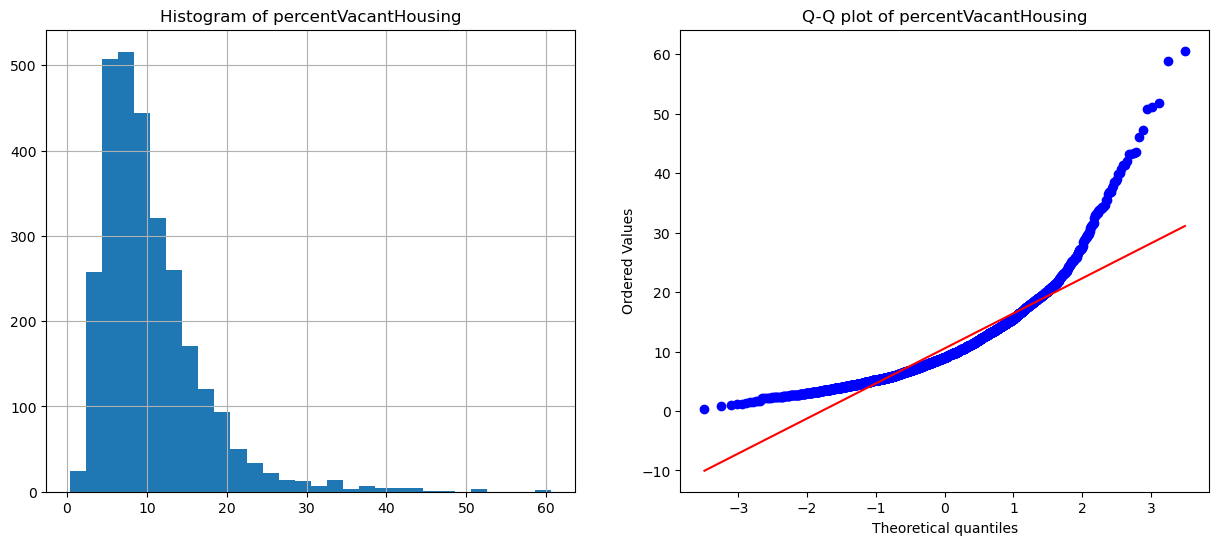

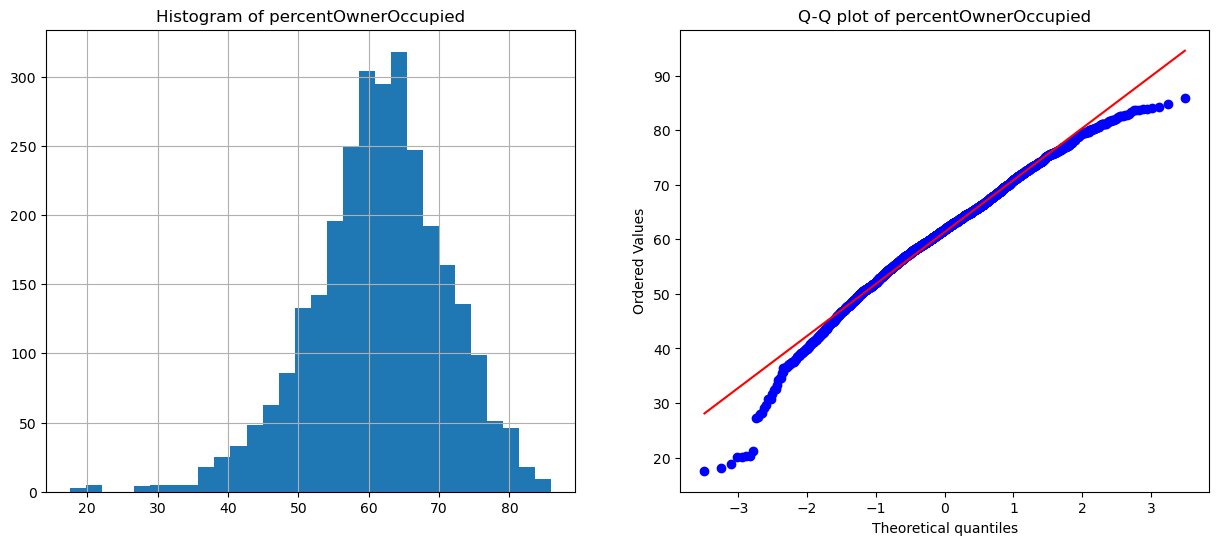

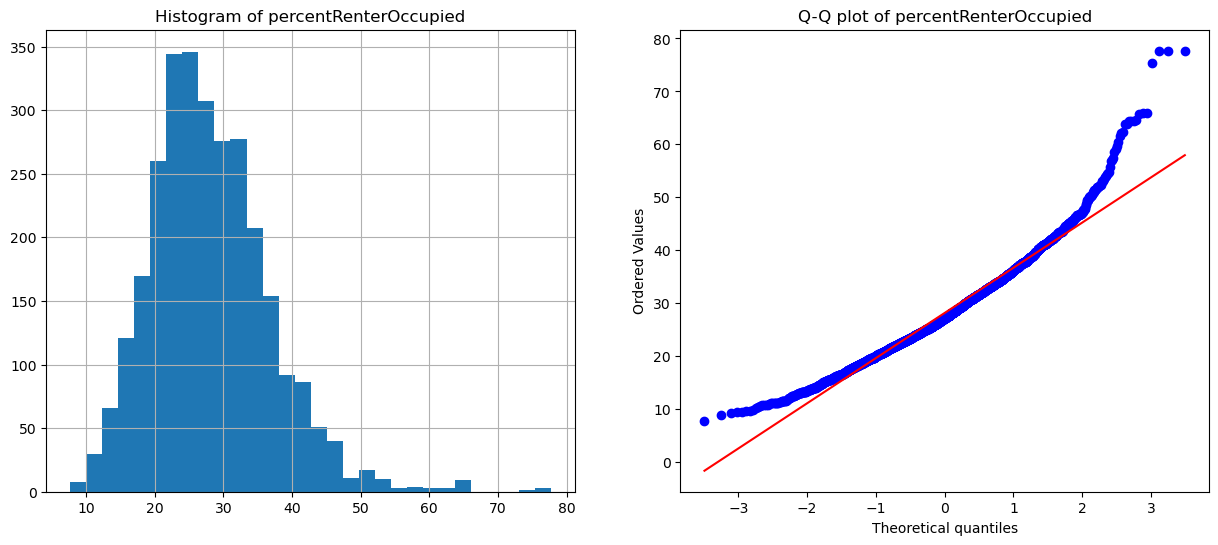

In [16]:
diagnostic_plots(teamSix, "percentVacantHousing")
diagnostic_plots(teamSix, "percentOwnerOccupied")
diagnostic_plots(teamSix, "percentRenterOccupied")

#### Applying log transformations to all housing variables

In [17]:
teamSixCopy = teamSix.copy()

In [18]:
housingFeaturesToTransform = ['percentVacantHousing','percentOwnerOccupied','percentRenterOccupied']
teamSixCopy[housingFeaturesToTransform] = np.log(teamSix[housingFeaturesToTransform])

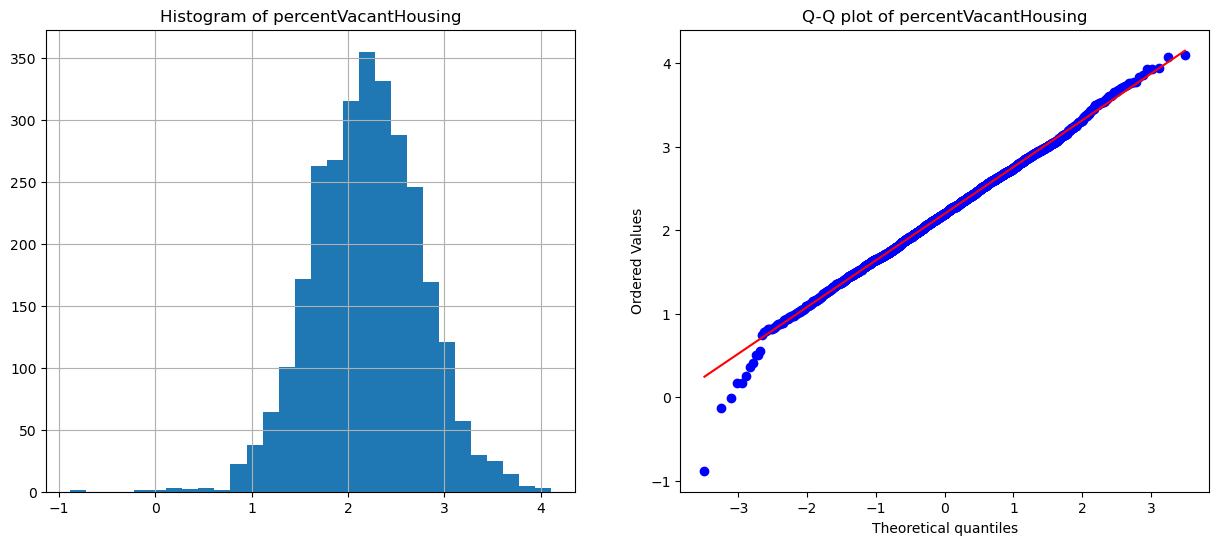

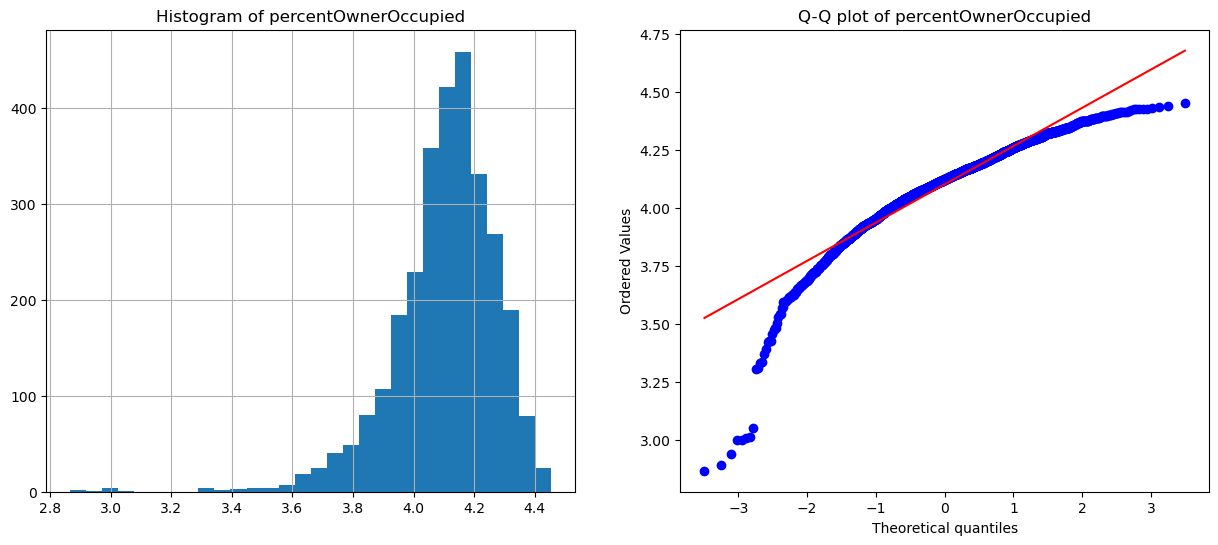

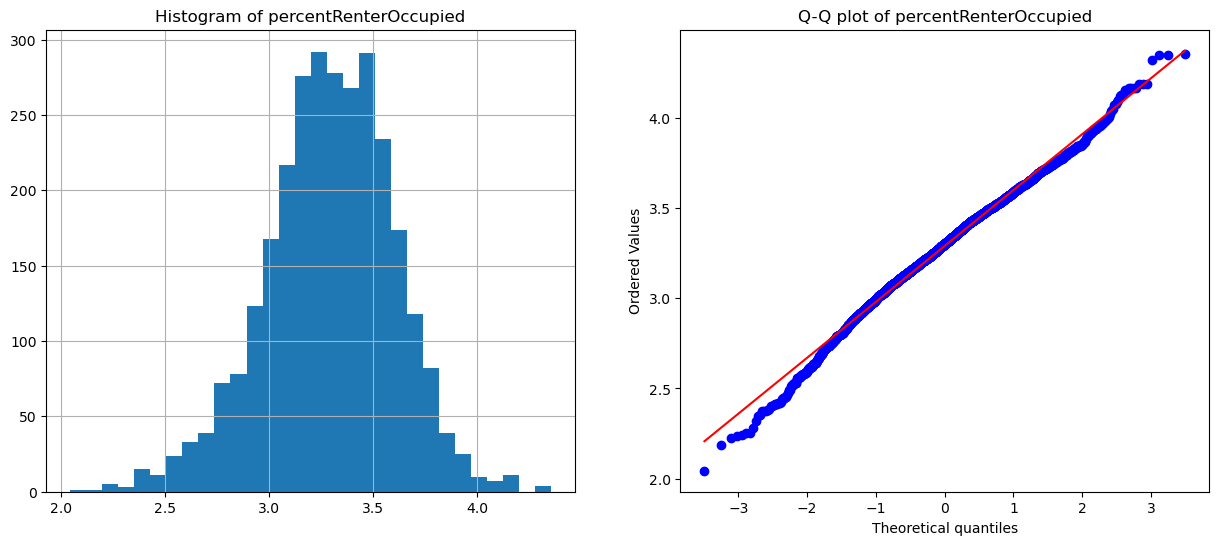

In [19]:
diagnostic_plots(teamSixCopy, "percentVacantHousing")
diagnostic_plots(teamSixCopy, "percentOwnerOccupied")
diagnostic_plots(teamSixCopy, "percentRenterOccupied")

#### Testing again above, it's clear that percentOwnerOccupied could use another approach. Below, I will try a boxCox transformation.

In [20]:
from scipy.stats import boxcox

# Assuming teamSix is your DataFrame
# Box-Cox transformation requires non-negative values, so ensure there are no negative values
teamSixCopy['percentOwnerOccupied'] = teamSix['percentOwnerOccupied'].apply(lambda x: max(x, 0.0001))  

# Apply Box-Cox transformation
transformed_values, lambda_parameter = boxcox(teamSixCopy['percentOwnerOccupied'])

# Update the 'percentOwnerOccupied' column with the transformed values
teamSixCopy['percentOwnerOccupied'] = transformed_values

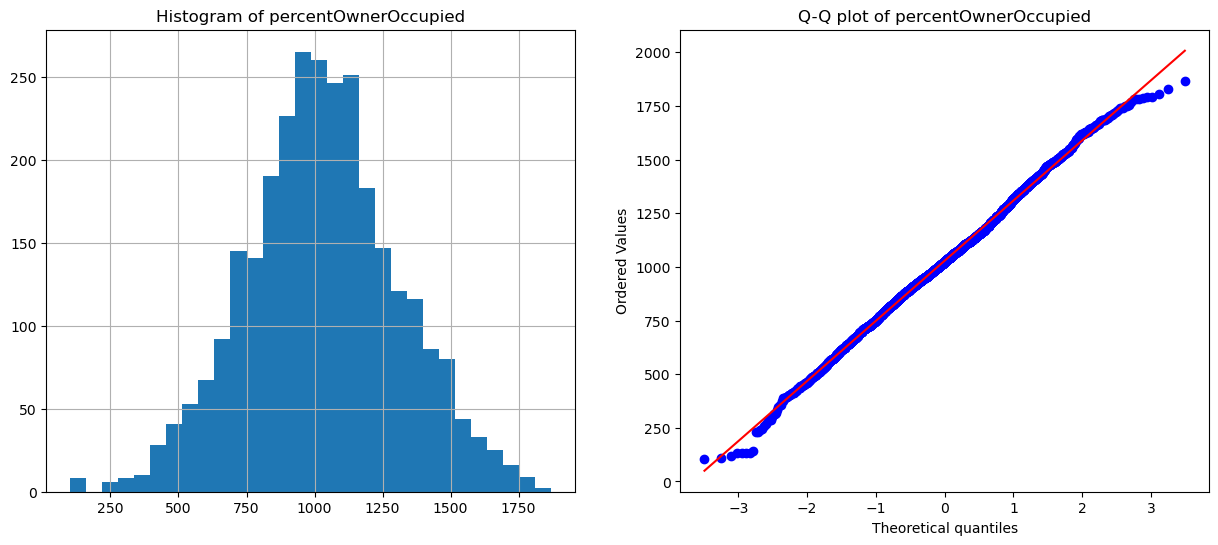

In [21]:
diagnostic_plots(teamSixCopy, "percentOwnerOccupied")

#### As we can see above, percentOwnerOccupied performs better with a boxCox transformation, while the others are satisfactory with a log transformation. Below, I am finalizing the transformations for the housing features on our main dataframe.

In [22]:
teamSix['percentVacantHousing'] = teamSixCopy['percentVacantHousing']
teamSix['percentRenterOccupied'] = teamSixCopy['percentRenterOccupied']

teamSix['percentOwnerOccupied'] = teamSix['percentOwnerOccupied'].apply(lambda x: max(x, 0.0001))  

# Apply Box-Cox transformation
transformed_values, lambda_parameter = boxcox(teamSix['percentOwnerOccupied'])

# Update the 'percentOwnerOccupied' column with the transformed values
teamSix['percentOwnerOccupied'] = transformed_values

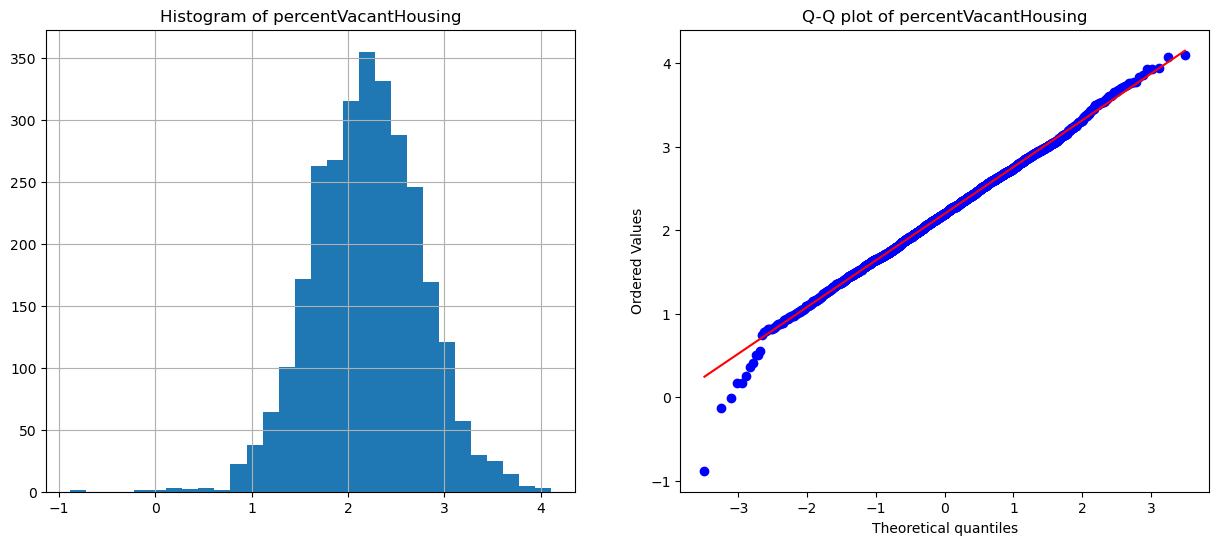

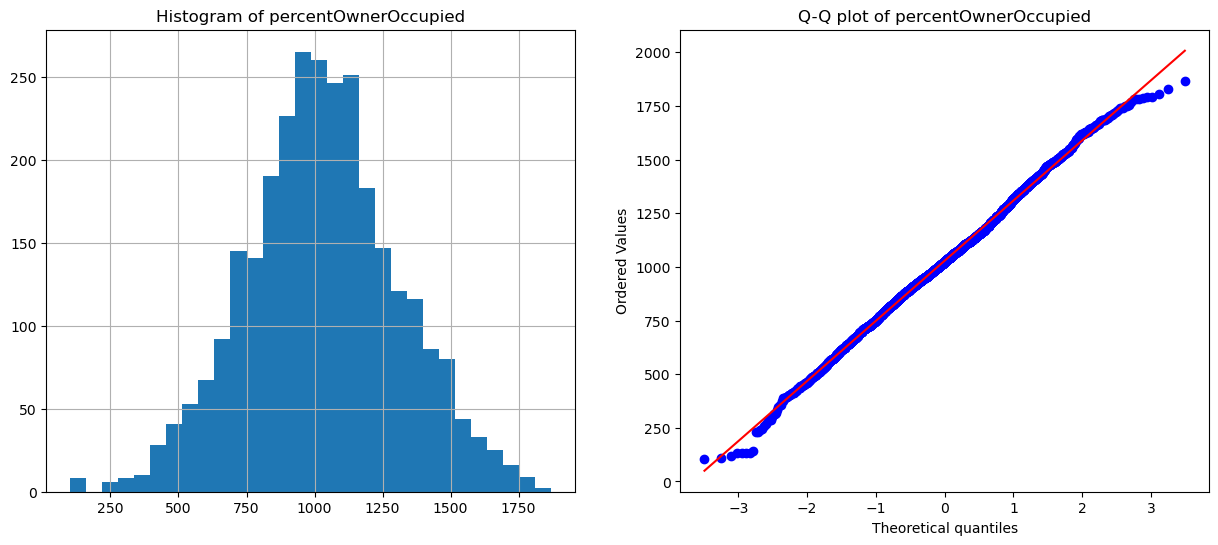

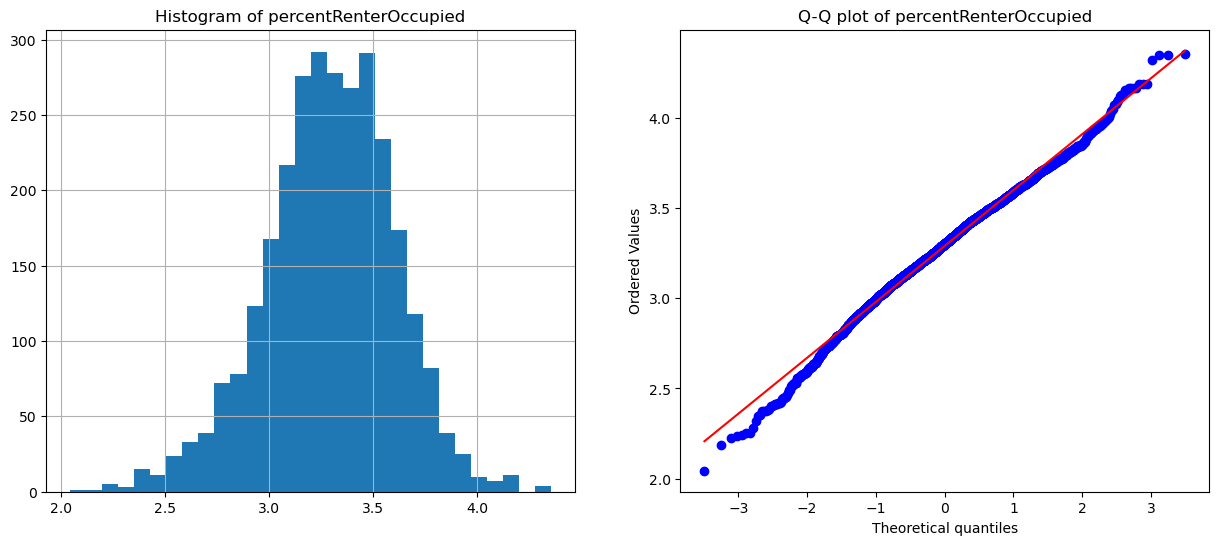

In [23]:
diagnostic_plots(teamSix, "percentVacantHousing")
diagnostic_plots(teamSix, "percentOwnerOccupied")
diagnostic_plots(teamSix, "percentRenterOccupied")

#### After the transformations, the housing features are now properly distributed.

In [24]:
teamSix.head()

,year,FIPS,county,state,urban,analysis_value,Total not grad HS,Total grad HS,Total Associates,Total Bachelors,Total Professional or Graduate Degrees,Under 25 years,26 to 54 years,Over 55 years,Region,Labor Force Participation Rate(ages 16 and over),Unemployment Rate(ages 16 and over),Below poverty line in last 12 months,percentVacantHousing,percentOwnerOccupied,percentRenterOccupied,Wealth,majorityDominated,Male/Female <20yr ratio,Male/Female 20-54yr ratio,Male/Female 55<=yr ratio
0,2018,10001,Kent County,DELAWARE,Urban,681,0.097907,0.441710,0.067980,0.286056,0.045462,0.345204,0.354912,0.299883,South,65.4,6.7,36.1,1.970809,1063.923500,3.391675,1.0,1,63.107846,0.470871,2.123722
1,2018,10003,New Castle County,DELAWARE,Urban,638,0.054032,0.311294,0.059913,0.435119,0.068190,0.324335,0.385860,0.289805,South,55.3,4.0,36.6,2.088947,1042.194668,3.385207,1.0,1,62.399490,0.473147,2.113510
2,2018,10005,Sussex County,DELAWARE,Rural,594,0.065877,0.402975,0.058478,0.345817,0.057711,0.255339,0.302614,0.442047,South,70.7,7.5,25.8,3.518864,776.434540,2.575257,1.0,1,53.119241,0.247268,4.044194
3,2018,11001,District of Columbia,DISTRICT OF COLUMBIA,Urban,917,0.048637,0.225696,0.037721,0.699749,0.160299,0.315873,0.463912,0.220215,South,61.4,5.8,39.0,2.307115,421.423267,3.949768,1.0,0,inf,0.000000,inf
4,2018,12001,Alachua County,FLORIDA,Urban,736,0.042081,0.247818,0.130255,0.505033,0.084823,0.410785,0.342095,0.247120,South,61.0,5.3,38.4,2.879579,674.075198,3.497302,1.0,1,49.166989,0.671716,1.488725


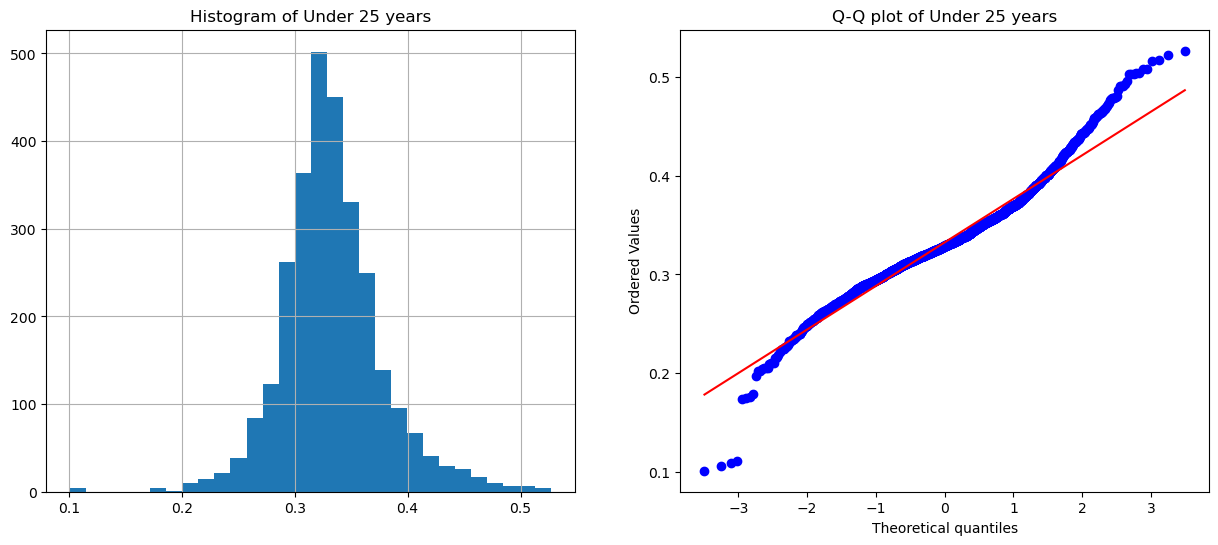

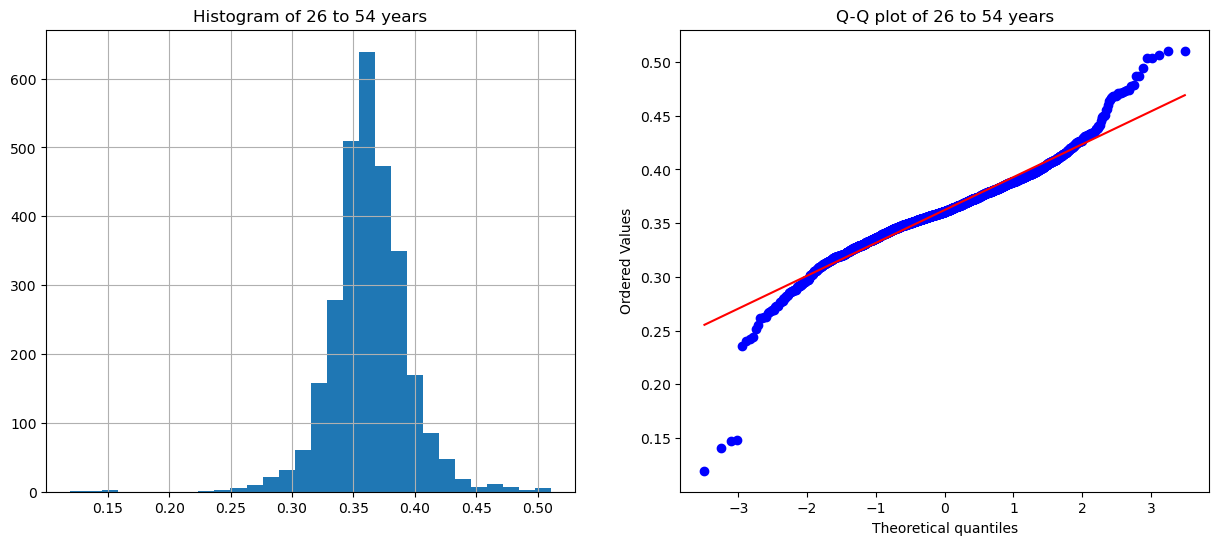

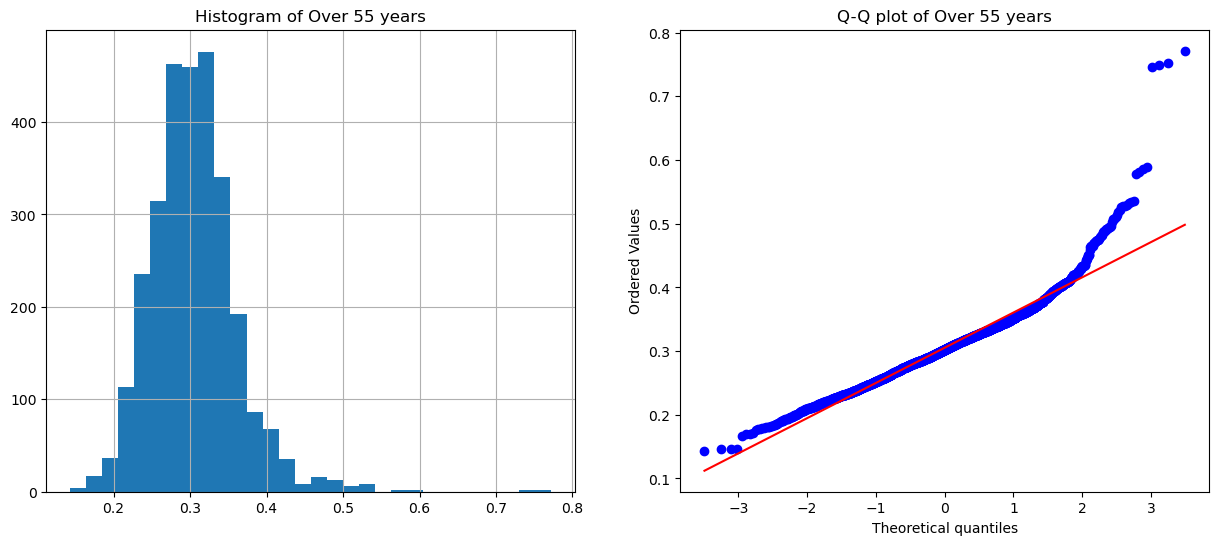

In [25]:
diagnostic_plots(teamSix, "Under 25 years")
diagnostic_plots(teamSix, "26 to 54 years")
diagnostic_plots(teamSix, "Over 55 years")

In [26]:
features_to_transform = ["Under 25 years", "26 to 54 years", "Over 55 years"]

# Loop through each feature
for feature in features_to_transform:
    # Find the lowest value in the feature
    min_value = teamSix[feature].min()
    
    # Calculate the constant to add (absolute value of the lowest value + 1)
    constant = abs(min_value) + 1
    
     #Add the constant to all data points in the feature
    teamSix[feature] += constant
    
    # Apply Box-Cox transformation
    transformed_values, lambda_parameter = boxcox(teamSix[feature])
    
    # Update the feature column with the transformed values
    teamSix[feature] = transformed_values

#### As you can see below, the transformation marginally fixed the distribution of these features.

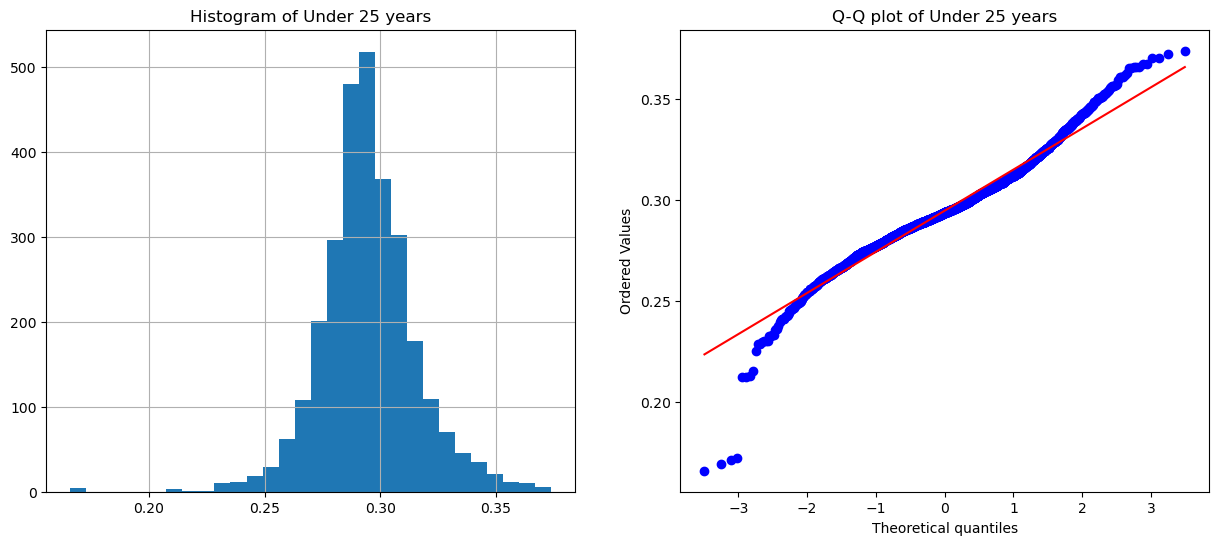

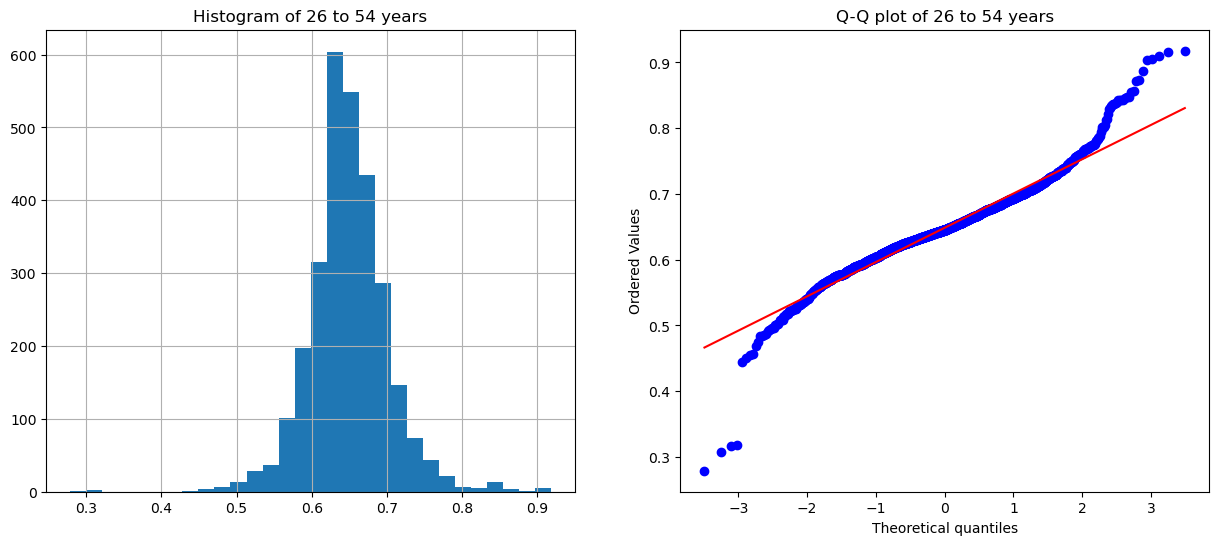

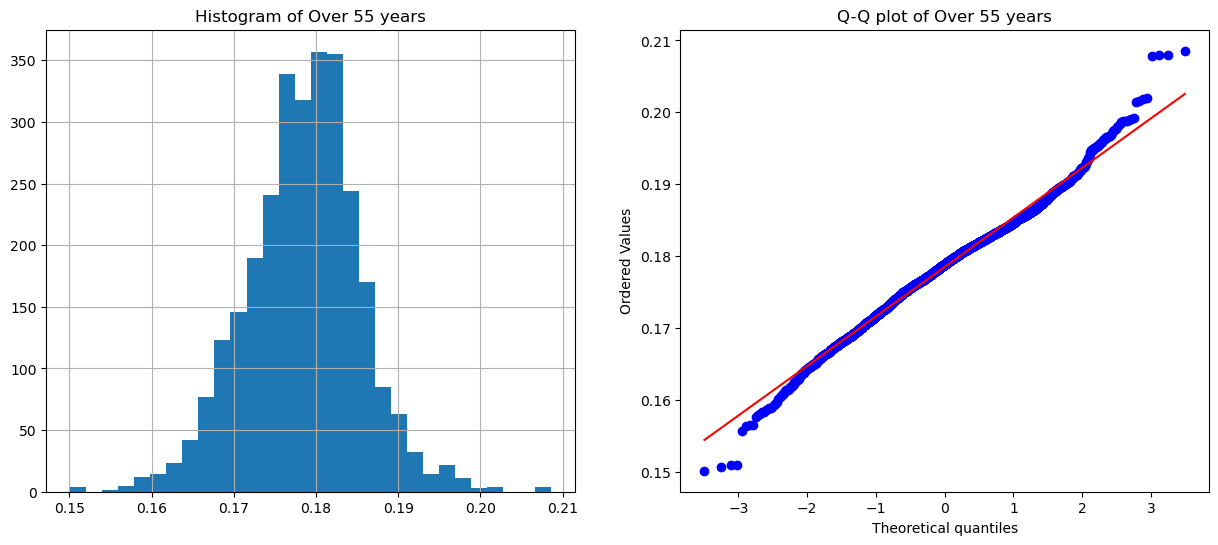

In [27]:
diagnostic_plots(teamSix, "Under 25 years")
diagnostic_plots(teamSix, "26 to 54 years")
diagnostic_plots(teamSix, "Over 55 years")

# Fixing "Unemployment Rate(ages 16 and over)" column

Optimal λ:  -0.04478573943176034


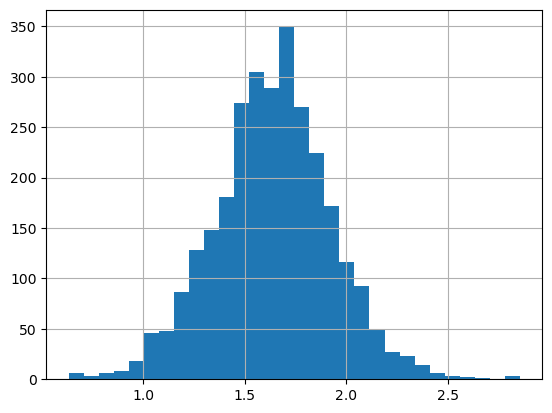

In [28]:
teamSix["Unemployment Rate(ages 16 and over)"], param = stats.yeojohnson(teamSix["Unemployment Rate(ages 16 and over)"])

# print the optimal lambda found for MedInc
print("Optimal λ: ", param)

# visualize the transformed variable
teamSix["Unemployment Rate(ages 16 and over)"].hist(bins=30)
plt.show()

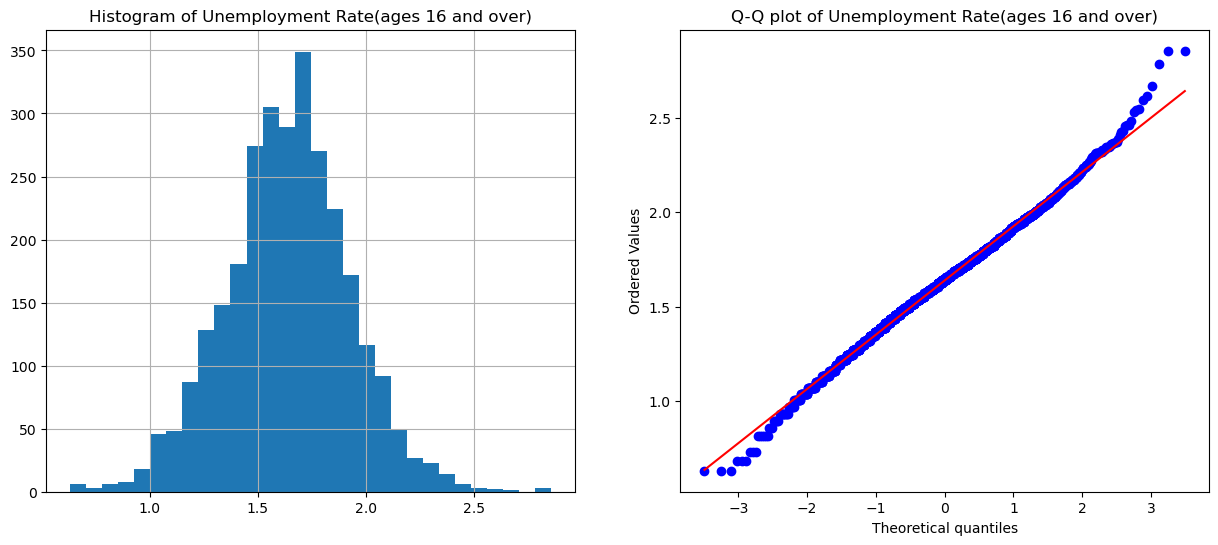

In [29]:
diagnostic_plots(teamSix, "Unemployment Rate(ages 16 and over)")

In [30]:
teamSix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              2899 non-null   int64  
 1   FIPS                                              2899 non-null   int64  
 2   county                                            2899 non-null   object 
 3   state                                             2899 non-null   object 
 4   urban                                             2899 non-null   object 
 5   analysis_value                                    2899 non-null   int64  
 6   Total not grad HS                                 2899 non-null   float64
 7   Total grad HS                                     2899 non-null   float64
 8   Total Associates                                  2899 non-null   float64
 9   Total Bachelors    

In [36]:
def impute_by_state_and_year(df, cols_to_impute):
    for col in cols_to_impute:
        df[col] = df.groupby(['state', 'year'])[col].transform(lambda x: x.fillna(x.mean()))
    return df

In [37]:
teamSix = impute_by_state_and_year(teamSix,["Male/Female 55<=yr ratio"])

In [39]:
teamSix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   year                                              2899 non-null   int64  
 1   FIPS                                              2899 non-null   int64  
 2   county                                            2899 non-null   object 
 3   state                                             2899 non-null   object 
 4   urban                                             2899 non-null   object 
 5   analysis_value                                    2899 non-null   int64  
 6   Total not grad HS                                 2899 non-null   float64
 7   Total grad HS                                     2899 non-null   float64
 8   Total Associates                                  2899 non-null   float64
 9   Total Bachelors    